<a href="https://colab.research.google.com/github/ruthvik-2911/Aadhar-hackathon/blob/main/UIDAI_FINAL_COPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
bio1 = pd.read_csv("api_data_aadhar_biometric_0_500000.csv")
bio2 = pd.read_csv("api_data_aadhar_biometric_500000_1000000.csv")
bio3 = pd.read_csv("api_data_aadhar_biometric_1000000_1500000.csv")
bio4 = pd.read_csv("api_data_aadhar_biometric_1500000_1861108.csv")

bio_df = pd.concat([bio1, bio2, bio3, bio4], ignore_index=True)


In [ ]:
bio_df.shape


(1766166, 7)

In [ ]:
bio_df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_plus,total_bio_attempts
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,857
1,2025-03-01,Bihar,Madhepura,852121,144,369,513
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,1734
3,2025-03-01,Bihar,Bhojpur,802158,256,980,1236
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,1086


In [ ]:
bio_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1766166 entries, 0 to 1861107
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   state               object        
 2   district            object        
 3   pincode             int64         
 4   bio_age_5_17        int64         
 5   bio_age_17_plus     int64         
 6   total_bio_attempts  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 107.8+ MB


In [ ]:
bio_df['date'] = pd.to_datetime(bio_df['date'], dayfirst=True)

bio_df['district'] = (
    bio_df['district']
    .str.strip()
    .str.title()
)

bio_df = bio_df.drop_duplicates()


In [ ]:
# Rename column safely
bio_df.rename(
    columns={'bio_age_17_': 'bio_age_17_plus'},
    inplace=True
)


In [ ]:
bio_df.columns


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17',
       'bio_age_17_plus', 'total_bio_attempts'],
      dtype='object')

In [ ]:
bio_df['date'] = pd.to_datetime(
    bio_df['date'],
    dayfirst=True,
    errors='coerce'
)


In [ ]:
bio_df['date'].dtype


dtype('<M8[ns]')

In [ ]:
bio_df['date'].isna().sum()


np.int64(0)

In [ ]:
bio_df['total_bio_attempts'] = (
    bio_df['bio_age_5_17'] +
    bio_df['bio_age_17_plus']
)


In [ ]:
bio_df[['bio_age_5_17', 'bio_age_17_plus']].describe()


,bio_age_5_17,bio_age_17_plus
count,1.766166e+06,1.766166e+06
mean,1.894309e+01,1.970617e+01
std,8.581852e+01,9.030689e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,4.000000e+00,4.000000e+00
75%,1.100000e+01,1.000000e+01
max,8.002000e+03,7.625000e+03


In [ ]:
bio_df[['bio_age_5_17', 'bio_age_17_plus', 'total_bio_attempts']].head()


,bio_age_5_17,bio_age_17_plus,total_bio_attempts
0,280,577,857
1,144,369,513
2,643,1091,1734
3,256,980,1236
4,271,815,1086


In [ ]:
bio_df['total_bio_attempts'] = (
    bio_df['bio_age_5_17'] +
    bio_df['bio_age_17_plus']
)


In [ ]:
bio_df = bio_df[bio_df['district'] != '?']


In [ ]:
bio_df['district'].unique()


array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda *', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga',

In [ ]:
district_day_bio = bio_df.groupby(
    ['district', 'date'],
    as_index=False
)['total_bio_attempts'].sum()


In [ ]:
district_day_bio.head()


,district,date,total_bio_attempts
0,Adilabad,2025-03-01,12872
1,Adilabad,2025-04-01,9333
2,Adilabad,2025-05-01,10412
3,Adilabad,2025-06-01,14734
4,Adilabad,2025-07-01,17026


In [ ]:
district_day_bio.shape


(74955, 3)

In [ ]:
district_avg_bio = district_day_bio.groupby(
    'district',
    as_index=False
)['total_bio_attempts'].mean()

district_avg_bio.rename(
    columns={'total_bio_attempts': 'avg_daily_bio_attempts'},
    inplace=True
)


In [ ]:
district_avg_bio.head()


,district,avg_daily_bio_attempts
0,Adilabad,1464.885057
1,Agar Malwa,197.120482
2,Agra,2578.247191
3,Ahilyanagar,2.125000
4,Ahmadabad,181.404762


In [ ]:
district_avg_bio.describe()


,avg_daily_bio_attempts
count,948.000000
mean,829.360059
std,911.989552
min,1.000000
25%,93.269937
50%,565.453892
75%,1251.152299
max,6745.363636


In [ ]:
threshold = district_day_bio['total_bio_attempts'].quantile(0.75)

district_day_bio['high_load_day'] = (
    district_day_bio['total_bio_attempts'] > threshold
)


In [ ]:
high_load_freq = district_day_bio.groupby(
    'district',
    as_index=False
)['high_load_day'].mean()

high_load_freq.rename(
    columns={'high_load_day': 'high_load_frequency'},
    inplace=True
)


In [ ]:
high_load_freq.head()


,district,high_load_frequency
0,Adilabad,0.724138
1,Agar Malwa,0.060241
2,Agra,0.797753
3,Ahilyanagar,0.000000
4,Ahmadabad,0.059524


In [ ]:
district_day_youth = bio_df.groupby(
    ['district', 'date'],
    as_index=False
)[['bio_age_5_17', 'total_bio_attempts']].sum()

district_day_youth['youth_ratio'] = (
    district_day_youth['bio_age_5_17'] /
    district_day_youth['total_bio_attempts']
)

avg_youth_ratio = district_day_youth.groupby(
    'district',
    as_index=False
)['youth_ratio'].mean()

avg_youth_ratio.rename(
    columns={'youth_ratio': 'avg_youth_ratio'},
    inplace=True
)


In [ ]:
district_day_youth.head()


,district,date,bio_age_5_17,total_bio_attempts,youth_ratio
0,Adilabad,2025-03-01,4096,12872,0.318210
1,Adilabad,2025-04-01,3265,9333,0.349834
2,Adilabad,2025-05-01,5327,10412,0.511621
3,Adilabad,2025-06-01,7712,14734,0.523415
4,Adilabad,2025-07-01,5876,17026,0.345119


In [ ]:
avg_youth_ratio.head()


,district,avg_youth_ratio
0,Adilabad,0.440329
1,Agar Malwa,0.277319
2,Agra,0.614449
3,Ahilyanagar,0.025000
4,Ahmadabad,0.059540


In [ ]:
bio_features = district_avg_bio.merge(
    high_load_freq,
    on='district'
).merge(
    avg_youth_ratio,
    on='district'
)


In [ ]:
bio_features.head()


,district,avg_daily_bio_attempts,high_load_frequency,avg_youth_ratio
0,Adilabad,1464.885057,0.724138,0.440329
1,Agar Malwa,197.120482,0.060241,0.277319
2,Agra,2578.247191,0.797753,0.614449
3,Ahilyanagar,2.125000,0.000000,0.025000
4,Ahmadabad,181.404762,0.059524,0.059540


In [ ]:
bio_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                948 non-null    object 
 1   avg_daily_bio_attempts  948 non-null    float64
 2   high_load_frequency     948 non-null    float64
 3   avg_youth_ratio         948 non-null    float64
dtypes: float64(3), object(1)
memory usage: 29.8+ KB


In [ ]:
bio_features.isnull().sum()


,0
district,0
avg_daily_bio_attempts,0
high_load_frequency,0
avg_youth_ratio,0


In [ ]:
demo1 = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")
demo2 = pd.read_csv("api_data_aadhar_demographic_500000_1000000.csv")
demo3 = pd.read_csv("api_data_aadhar_demographic_1000000_1500000.csv")
demo4 = pd.read_csv("api_data_aadhar_demographic_1500000_2000000.csv")
demo5 = pd.read_csv("api_data_aadhar_demographic_2000000_2071700.csv")

demo_df = pd.concat([demo1, demo2, demo3, demo4, demo5], ignore_index=True)


In [ ]:
demo_df.shape


(2071700, 6)

In [ ]:
demo_df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [ ]:
demo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [ ]:
demo_df['district'] = (
    demo_df['district']
    .str.strip()
    .str.title()
)


In [ ]:
demo_df['district'].unique()[:10]


array(['Gorakhpur', 'Chittoor', 'Rajkot', 'Srikakulam', 'Udaipur',
       'Sikar', 'Tumakuru', 'Kurnool', 'Paschim Medinipur', 'Ghazipur'],
      dtype=object)

In [ ]:
demo_df.rename(
    columns={'demo_age_17_': 'demo_age_17_plus'},
    inplace=True
)


In [ ]:
demo_df.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_plus'],
      dtype='object')

In [ ]:
demo_df['youth_population'] = (
    demo_df['demo_age_5_17'] +
    demo_df['demo_age_17_plus']
)


In [ ]:
demo_df[['demo_age_5_17', 'demo_age_17_plus', 'youth_population']].head()


,demo_age_5_17,demo_age_17_plus,youth_population
0,49,529,578
1,22,375,397
2,65,765,830
3,24,314,338
4,45,785,830


In [ ]:
avg_youth_population = demo_df.groupby(
    'district',
    as_index=False
)['youth_population'].mean()


In [ ]:
avg_youth_population.head()


,district,youth_population
0,100000,1.000000
1,5Th Cross,1.000000
2,Adilabad,10.749607
3,Agar Malwa,19.229572
4,Agra,72.647812


In [ ]:
avg_youth_population.describe()


,youth_population
count,961.000000
mean,25.507871
std,31.159775
min,0.777778
25%,6.039019
50%,14.421692
75%,36.836957
max,341.762712


In [ ]:
avg_youth_population.isnull().sum()


,0
district,0
youth_population,0


In [ ]:
avg_youth_population.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          961 non-null    object 
 1   youth_population  961 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.1+ KB


In [ ]:
final_data = bio_features.merge(
    avg_youth_population,
    on='district',
    how='left'
)


In [ ]:
final_data.head()


,district,avg_daily_bio_attempts,high_load_frequency,avg_youth_ratio,youth_population
0,Adilabad,1464.885057,0.724138,0.440329,10.749607
1,Agar Malwa,197.120482,0.060241,0.277319,19.229572
2,Agra,2578.247191,0.797753,0.614449,72.647812
3,Ahilyanagar,2.125000,0.000000,0.025000,2.379921
4,Ahmadabad,181.404762,0.059524,0.059540,2.859248


In [ ]:
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                948 non-null    object 
 1   avg_daily_bio_attempts  948 non-null    float64
 2   high_load_frequency     948 non-null    float64
 3   avg_youth_ratio         948 non-null    float64
 4   youth_population        939 non-null    float64
dtypes: float64(4), object(1)
memory usage: 37.2+ KB


In [ ]:
final_data.isnull().sum()


,0
district,0
avg_daily_bio_attempts,0
high_load_frequency,0
avg_youth_ratio,0
youth_population,9


In [ ]:
avg_youth_population.columns


Index(['district', 'youth_population'], dtype='object')

In [ ]:
avg_youth_population.rename(
    columns={'youth_population': 'avg_youth_population'},
    inplace=True
)


In [ ]:
avg_youth_population.head()


,district,avg_youth_population
0,100000,1.000000
1,5Th Cross,1.000000
2,Adilabad,10.749607
3,Agar Malwa,19.229572
4,Agra,72.647812


In [ ]:
final_data = bio_features.merge(
    avg_youth_population,
    on='district',
    how='left'
)


In [ ]:
final_data['avg_youth_population'] = (
    final_data['avg_youth_population']
    .fillna(final_data['avg_youth_population'].median())
)


In [ ]:
final_data.isnull().sum()


,0
district,0
avg_daily_bio_attempts,0
high_load_frequency,0
avg_youth_ratio,0
avg_youth_population,0


In [ ]:
final_data[['avg_youth_population']].describe()


,avg_youth_population
count,948.000000
mean,25.975795
std,31.163541
min,0.777778
25%,6.553235
50%,14.914460
75%,36.934947
max,341.762712


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_to_normalize = [
    'avg_daily_bio_attempts',
    'high_load_frequency',
    'avg_youth_ratio'
]

final_data[
    ['load_norm', 'freq_norm', 'youth_norm']
] = scaler.fit_transform(
    final_data[features_to_normalize]
)


In [ ]:
final_data[['load_norm', 'freq_norm', 'youth_norm']].head()


,load_norm,freq_norm,youth_norm
0,0.217053,0.767761,0.440329
1,0.029079,0.063870,0.277319
2,0.382133,0.845810,0.614449
3,0.000167,0.000000,0.025000
4,0.026749,0.063110,0.059540


In [ ]:
final_data['accessibility_stress_index'] = (
    0.5 * final_data['load_norm'] +
    0.3 * final_data['freq_norm'] +
    0.2 * final_data['youth_norm']
)


In [ ]:
final_data[['district', 'accessibility_stress_index']].head()


,district,accessibility_stress_index
0,Adilabad,0.426921
1,Agar Malwa,0.089164
2,Agra,0.567700
3,Ahilyanagar,0.005083
4,Ahmadabad,0.044215


In [ ]:
final_data['accessibility_stress_index'].describe()


,accessibility_stress_index
count,948.000000
mean,0.226005
std,0.160506
min,0.000000
25%,0.123075
50%,0.175830
75%,0.316715
max,0.903834


In [ ]:
final_data['risk_zone'] = pd.qcut(
    final_data['accessibility_stress_index'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


In [ ]:
final_data.columns


Index(['district', 'avg_daily_bio_attempts', 'high_load_frequency',
       'avg_youth_ratio', 'avg_youth_population', 'load_norm', 'freq_norm',
       'youth_norm', 'accessibility_stress_index'],
      dtype='object')

In [ ]:
final_data[['accessibility_stress_index']].head()


,accessibility_stress_index
0,0.426921
1,0.089164
2,0.567700
3,0.005083
4,0.044215


In [ ]:
final_data['risk_zone'] = pd.qcut(
    final_data['accessibility_stress_index'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


In [ ]:
final_data['risk_zone'].value_counts()


,count
risk_zone,
Low,316
Medium,316
High,316


In [ ]:
final_data['binary_risk'] = (
    final_data['risk_zone'] != 'Low'
).astype(int)


In [ ]:
final_data[['district', 'accessibility_stress_index', 'risk_zone', 'binary_risk']].head()


,district,accessibility_stress_index,risk_zone,binary_risk
0,Adilabad,0.426921,High,1
1,Agar Malwa,0.089164,Low,0
2,Agra,0.567700,High,1
3,Ahilyanagar,0.005083,Low,0
4,Ahmadabad,0.044215,Low,0


In [ ]:
final_data['binary_risk'] = (
    final_data['risk_zone'] != 'Low'
).astype(int)


In [ ]:
final_data['binary_risk'].value_counts()


,count
binary_risk,
1,632
0,316


In [ ]:
final_data['binary_risk'].value_counts()


,count
binary_risk,
1,632
0,316


In [ ]:
features = [
    'accessibility_stress_index',
    'avg_daily_bio_attempts',
    'high_load_frequency',
    'avg_youth_population',
    'avg_youth_ratio'
]

X = final_data[features]
y = final_data['binary_risk']


In [ ]:
X.head()


,accessibility_stress_index,avg_daily_bio_attempts,high_load_frequency,avg_youth_population,avg_youth_ratio
0,0.426921,1464.885057,0.724138,10.749607,0.440329
1,0.089164,197.120482,0.060241,19.229572,0.277319
2,0.567700,2578.247191,0.797753,72.647812,0.614449
3,0.005083,2.125000,0.000000,2.379921,0.025000
4,0.044215,181.404762,0.059524,2.859248,0.059540


In [ ]:
y.value_counts()


,count
binary_risk,
1,632
0,316


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)


In [ ]:
y_train.value_counts(), y_test.value_counts()


(binary_risk
 1    472
 0    239
 Name: count, dtype: int64,
 binary_risk
 1    160
 0     77
 Name: count, dtype: int64)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score

cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [ ]:
cm, recall


(array([[ 77,   0],
        [  0, 160]]),
 1.0)

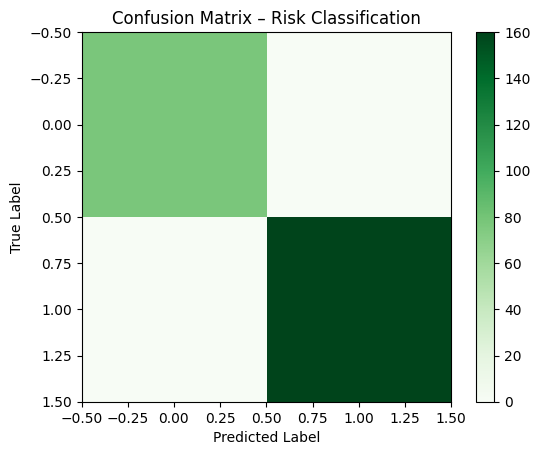

In [ ]:
plt.figure()
plt.imshow(cm, cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Risk Classification")
plt.colorbar()
plt.show()


In [ ]:
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)


In [ ]:
feature_importance_df


,feature,importance
0,accessibility_stress_index,0.574844
1,avg_daily_bio_attempts,0.187522
2,high_load_frequency,0.149444
4,avg_youth_ratio,0.065783
3,avg_youth_population,0.022407


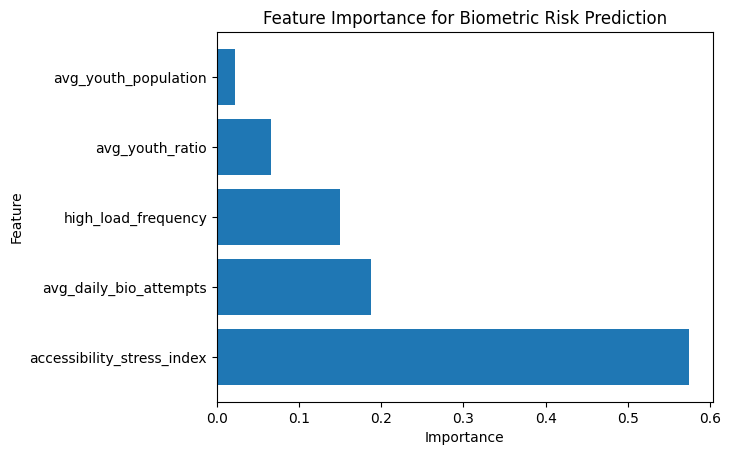

In [ ]:
plt.figure()
plt.barh(
    feature_importance_df['feature'],
    feature_importance_df['importance']
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Biometric Risk Prediction")
plt.show()


In [ ]:
final_data['simulated_load_norm'] = (
    final_data['load_norm'] * 0.85
)

final_data['simulated_freq_norm'] = (
    final_data['freq_norm'] * 0.80
)


In [ ]:
final_data['simulated_stress_index'] = (
    0.5 * final_data['simulated_load_norm'] +
    0.3 * final_data['simulated_freq_norm'] +
    0.2 * final_data['youth_norm']
)


In [ ]:
final_data[['accessibility_stress_index', 'simulated_stress_index']].head()


,accessibility_stress_index,simulated_stress_index
0,0.426921,0.364576
1,0.089164,0.083151
2,0.567700,0.488291
3,0.005083,0.005071
4,0.044215,0.038423


In [ ]:
final_data['stress_reduction'] = (
    final_data['accessibility_stress_index'] -
    final_data['simulated_stress_index']
)


In [ ]:
final_data['stress_reduction'].describe()


,stress_reduction
count,948.000000
mean,0.023663
std,0.026880
min,0.000000
25%,0.004219
50%,0.010899
75%,0.038815
max,0.135000


In [ ]:
top_reduction = final_data.sort_values(
    by='stress_reduction',
    ascending=False
).head(10)


In [ ]:
top_reduction[['district', 'stress_reduction']]


,district,stress_reduction
689,Pune,0.135000
852,Thane,0.130668
611,Nashik,0.130306
361,Jalgaon,0.108455
574,Mumbai,0.108252
48,Aurangabad,0.107301
5,Ahmadnagar,0.102506
7,Ahmedabad,0.101038
355,Jaipur,0.099821
703,Raigarh,0.099555


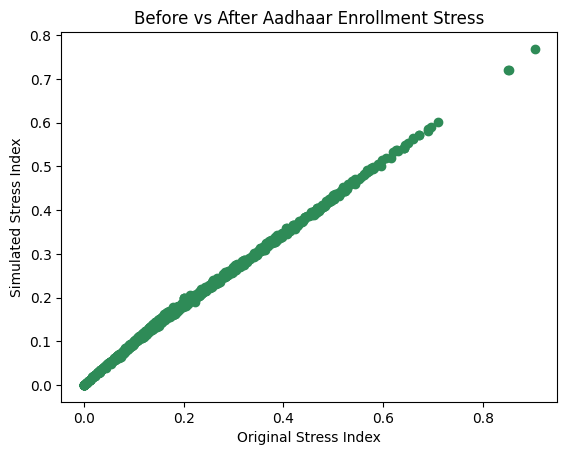

In [ ]:
plt.figure()
plt.scatter(
    final_data['accessibility_stress_index'],
    final_data['simulated_stress_index'],
    color='seagreen'
)
plt.xlabel("Original Stress Index")
plt.ylabel("Simulated Stress Index")
plt.title("Before vs After Aadhaar Enrollment Stress")
plt.show()


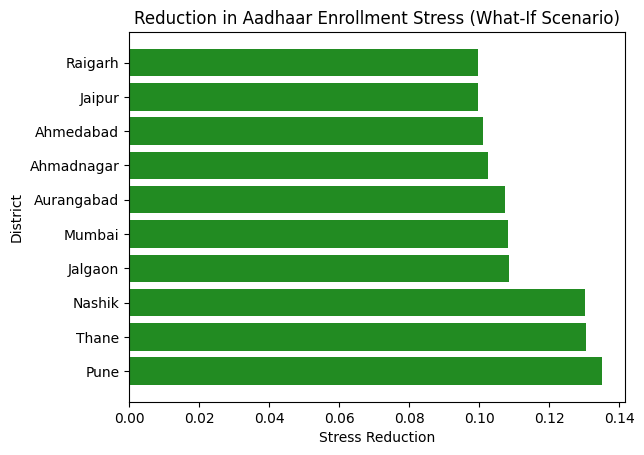

In [ ]:
plt.figure()
plt.barh(
    top_reduction['district'],
    top_reduction['stress_reduction'],
    color='forestgreen'
)
plt.xlabel("Stress Reduction")
plt.ylabel("District")
plt.title("Reduction in Aadhaar Enrollment Stress (What-If Scenario)")
plt.show()


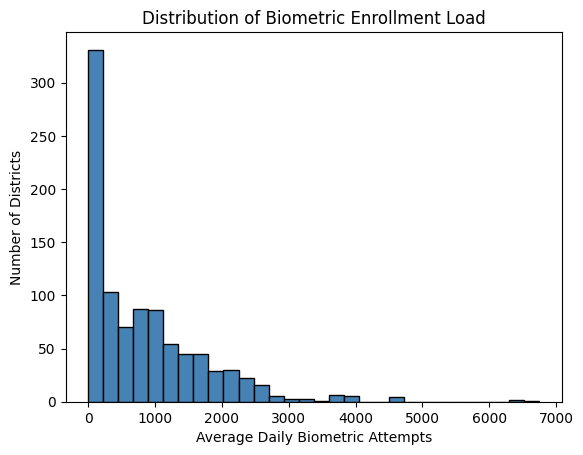

In [ ]:
plt.figure()
plt.hist(
    final_data['avg_daily_bio_attempts'],
    bins=30,
    color='steelblue',
    edgecolor='black'
)
plt.xlabel("Average Daily Biometric Attempts")
plt.ylabel("Number of Districts")
plt.title("Distribution of Biometric Enrollment Load")
plt.show()


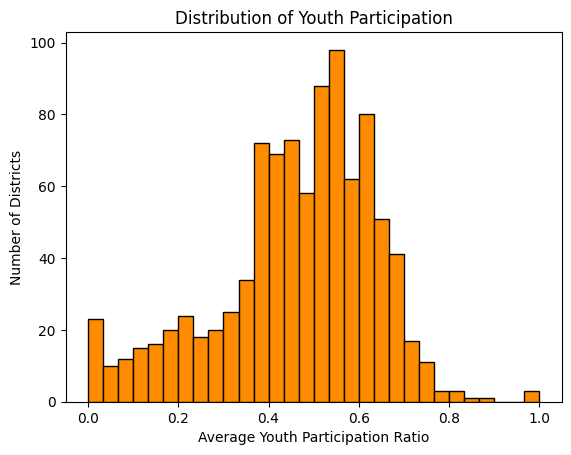

In [ ]:
plt.figure()
plt.hist(
    final_data['avg_youth_ratio'],
    bins=30,
    color='darkorange',
    edgecolor='black'
)
plt.xlabel("Average Youth Participation Ratio")
plt.ylabel("Number of Districts")
plt.title("Distribution of Youth Participation")
plt.show()


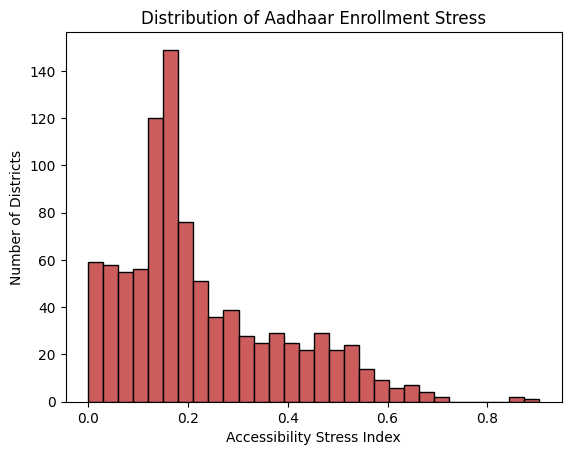

In [ ]:
plt.figure()
plt.hist(
    final_data['accessibility_stress_index'],
    bins=30,
    color='indianred',
    edgecolor='black'
)
plt.xlabel("Accessibility Stress Index")
plt.ylabel("Number of Districts")
plt.title("Distribution of Aadhaar Enrollment Stress")
plt.show()


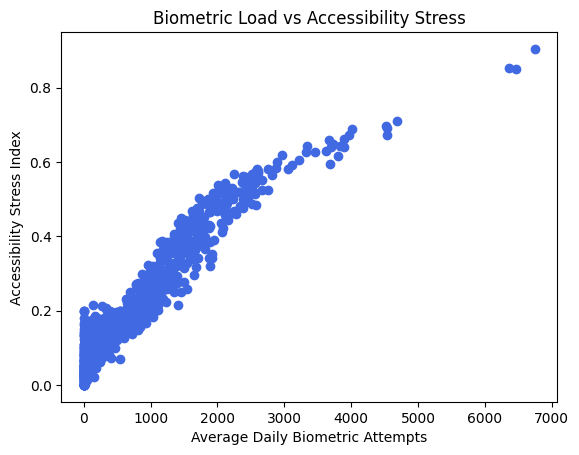

In [ ]:
plt.figure()
plt.scatter(
    final_data['avg_daily_bio_attempts'],
    final_data['accessibility_stress_index'],
    color='royalblue'
)
plt.xlabel("Average Daily Biometric Attempts")
plt.ylabel("Accessibility Stress Index")
plt.title("Biometric Load vs Accessibility Stress")
plt.show()


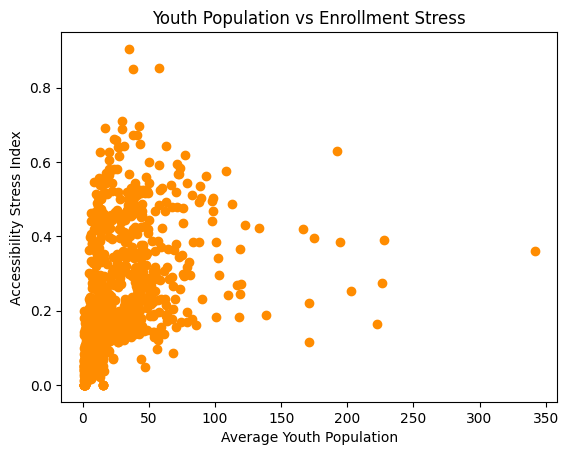

In [ ]:
plt.figure()
plt.scatter(
    final_data['avg_youth_population'],
    final_data['accessibility_stress_index'],
    color='darkorange'
)
plt.xlabel("Average Youth Population")
plt.ylabel("Accessibility Stress Index")
plt.title("Youth Population vs Enrollment Stress")
plt.show()


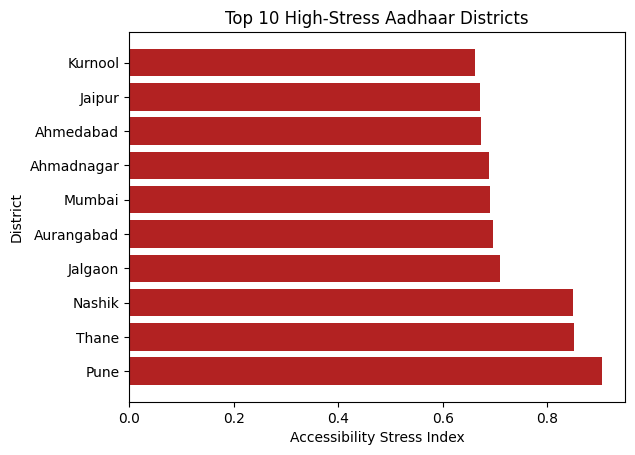

In [ ]:
top_stress = final_data.sort_values(
    by='accessibility_stress_index',
    ascending=False
).head(10)

plt.figure()
plt.barh(
    top_stress['district'],
    top_stress['accessibility_stress_index'],
    color='firebrick'
)
plt.xlabel("Accessibility Stress Index")
plt.ylabel("District")
plt.title("Top 10 High-Stress Aadhaar Districts")
plt.show()


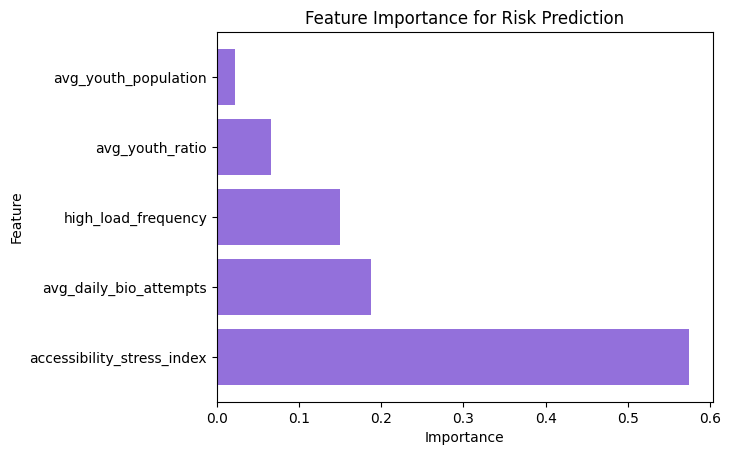

In [ ]:
plt.figure()
plt.barh(
    feature_importance_df['feature'],
    feature_importance_df['importance'],
    color='mediumpurple'
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Risk Prediction")
plt.show()
